In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')
q = "select * from sqlite_master where type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q2 = 'select * from facts limit 5'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [4]:
q3 = 'select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts'
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q4 = 'select name from facts where population = 0'
pd.read_sql_query(q4, conn)

,name
0,Antarctica


In [6]:
q5 = 'select name from facts where population = 7256490011'
pd.read_sql_query(q5, conn)

,name
0,World


The Facts table contains information about both Antarctica and the world as a whole, which is why we find a 'country' with 0 populationa and one with population >7.2 billion.

In [7]:
q6 = 'select population, population_growth, birth_rate, death_rate from facts where population != 0 and population != 7256490011'
non_outliers = pd.read_sql_query(q6, conn)
non_outliers.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


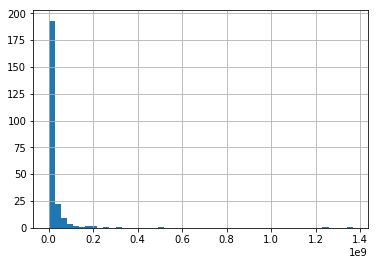

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
non_outliers['population'].hist(bins=50)

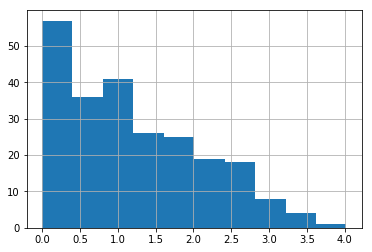

In [15]:
non_outliers['population_growth'].hist()

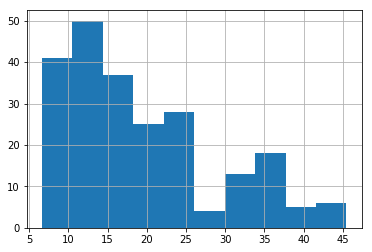

In [16]:
non_outliers['birth_rate'].hist()

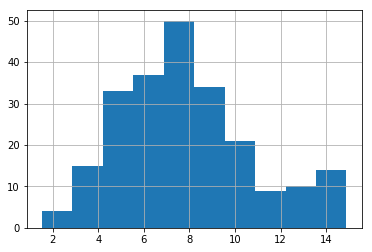

In [17]:
non_outliers['death_rate'].hist()